# 독버섯 데이터셋 모델링

### 데이터 로딩

In [4]:
# %pip install lightgbm
# %pip install xgboost
# %pip install --upgrade pip

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../DATA_WOO/mushroom.csv')

In [55]:
mushroom_data = df.iloc[:,1:]
mushroom_target = df.iloc[:,0]

### 범주 -> 수치

In [59]:
mushroom_data = pd.get_dummies(mushroom_data, list(mushroom_data.columns))

### 카테고리로 데이터 변경

In [61]:
mushroom_target = mushroom_target.replace('e', 1)
mushroom_target = mushroom_target.replace('p', 0)

In [51]:
# mushroom_target.to_numpy()
# mushroom_data.to_numpy()

array([['x', 's', 'y', ..., 'n', 'n', 'g'],
       ['b', 's', 'w', ..., 'n', 'n', 'm'],
       ['x', 'y', 'w', ..., 'k', 's', 'u'],
       ...,
       ['f', 's', 'n', ..., 'b', 'c', 'l'],
       ['k', 'y', 'n', ..., 'w', 'v', 'l'],
       ['x', 's', 'n', ..., 'o', 'c', 'l']], dtype=object)

In [62]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(mushroom_data, mushroom_target, random_state = 42)

In [63]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(train_data, train_target)

LogisticRegression()

In [65]:
print(lg.score(train_data, train_target))
print(lg.score(test_data, test_target))

1.0
1.0


In [64]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_data, train_target)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [66]:
print(xgb.score(train_data, train_target))
print(xgb.score(test_data, test_target))

1.0
1.0


In [67]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier()
tr.fit(train_data, train_target)

DecisionTreeClassifier()

In [68]:
print(tr.score(train_data, train_target))
print(tr.score(test_data, test_target))

1.0
1.0


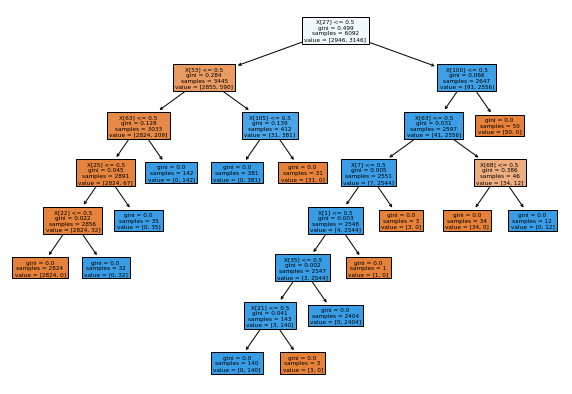

In [72]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(tr, filled=True)
plt.show()

In [70]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(train_data, train_target)
print(sv.score(train_data, train_target))
print(sv.score(test_data, test_target))

1.0
1.0
